In [14]:
import numpy as np
from scipy import stats

from matplotlib import pyplot as plt

In [33]:
#     n = spectrum.shape[0]  # sequence length
#     d = spectrum.shape[1]  # representation dimension
#     output = np.zeros((n, d))

#     positions = np.arange(n) + 1
#     PE_2i = np.sin(positions[::2] / 10000)
#     PE_2ip1 = np.cos(positions[1::2] / 10000)

#     output[::2, 0] = spectrum[::2, 0] + PE_2i
#     output[1::2, 0] = spectrum[1::2, 0] + PE_2ip1

def PE_i(pos, i, d_model, L=10_000):
    
    f_i = 1 / np.power(L, 2 * i / d_model)
    
    if i % 2 == 0:  # i is even
        return np.sin(pos * f_i)
    
    else:
        return np.cos(pos * f_i)

    
def positional_encoding_slow(seq, L):
    N = seq.shape[0]  # sequence length
    D = seq.shape[1]  # representation dimension
    assert seq.ndim == 2, seq.ndim

    output = np.zeros_like(seq)
    
    for pos in range(N):
        for i in range(D):
            output[pos, i] = PE_i(pos, i, D, L=L)
    
    return output

In [34]:
input_spec = stats.norm.rvs(loc=0, scale=1, size=(149, 1))
print(input_spec.shape)

PE = positional_encoding_slow(input_spec, 10000)
print(PE.shape)

(149, 1)
(149, 1)


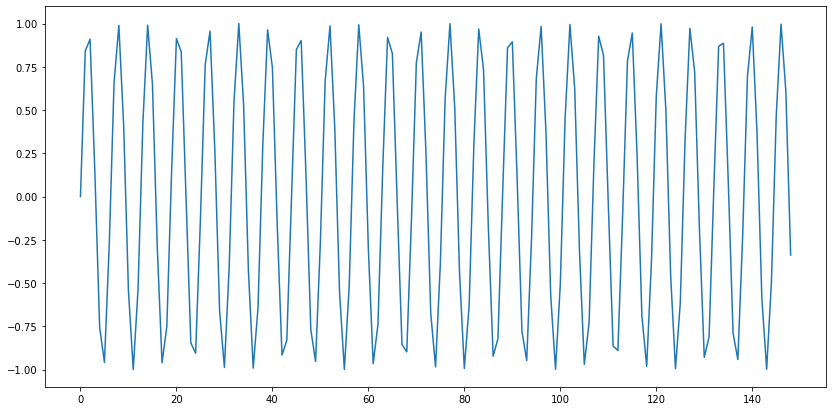

In [35]:
fig, ax = plt.subplots(figsize=(14, 7))
# ax.plot(input_spec[:, 0])
ax.plot(PE[:, 0])
# ax.plot(input_spec[:, 0] + PE[:, 0])

fig.show()